In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import json

In [64]:
usa = gpd.read_file('zipcodes.shp')
usa = usa.set_index('ZIP_CODE')

,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,Shape_Leng,Shape_Area,geometry
ZIP_CODE,,,,,,,,
00012,Mt Meadows Area,CA,NaN,NaN,30.92,0.633252,0.008475,"POLYGON ((-121.04557 40.25647, -121.04544 40.2..."
00014,West Pima County,AZ,NaN,NaN,1131.38,3.459478,0.280218,"POLYGON ((-113.33411 32.18660, -113.33411 32.1..."
00015,Coronado Ntl Forest,AZ,NaN,NaN,55.89,0.664997,0.013863,"POLYGON ((-110.72622 32.35582, -110.72621 32.3..."
00016,Sequoia National Forest,CA,NaN,NaN,39.33,0.505435,0.010120,"POLYGON ((-118.48421 35.55811, -118.48134 35.5..."
00017,Northeast Fresno County,CA,NaN,NaN,564.38,2.688467,0.148537,"POLYGON ((-119.18094 37.45879, -119.18092 37.4..."
...,...,...,...,...,...,...,...,...
99362,Walla Walla,WA,43985.0,170.61,257.81,2.312303,0.077682,"POLYGON ((-118.59802 46.23893, -118.59364 46.2..."
99371,Washtucna,WA,430.0,1.30,331.30,2.504238,0.101224,"POLYGON ((-118.54390 46.78039, -118.54333 46.7..."
99401,Anatone,WA,338.0,3.03,111.70,1.972491,0.033658,"POLYGON ((-117.38262 45.99814, -117.38257 45.9..."


# Remove some ZIP Codes that are too far from the continent
we are setting Seattle,WA as top left corner and Miami,FL as bottom right corner
This is previously done, and result is saved in the shape file

In [ ]:
'''def find_outside(geomlist):
    for a in geomlist:
        if a[1] < 22:
            return 'Yes'
    return 'No'

usa['geomlist'] = usa['geometry'].apply(lambda x: list(x[0].exterior.coords))
usa['detect'] = usa['geomlist'].apply(find_outside)
usa = usa.drop(usa[usa.detect == 'Yes'].index)
usa = usa.drop(['geomlist','detect'],axis=1)
usa.to_file("zipcodes.shp")
'''

# Focus on NY state right now

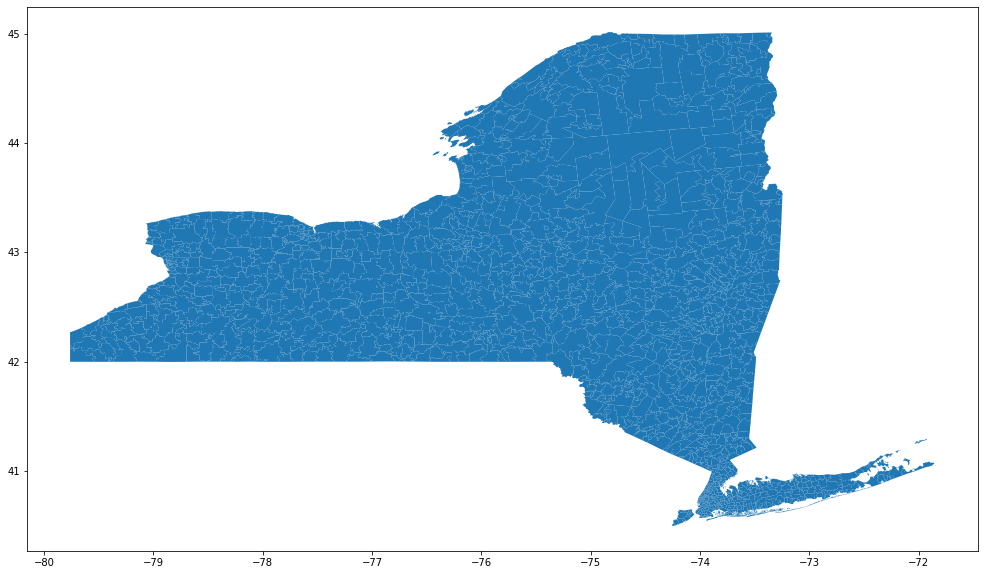

In [71]:
ny = usa[usa['STATE'] == 'NY']
ny = ny.set_index('ZIP_CODE')
plt.rcParams['figure.figsize'] = [20, 10]
ny.plot()

# Create a Choropleth Maps according to average price
we focus on 2015 BMW 3 Series at this point

In [11]:
with open('usedcar/usedcar.json') as f:
    data = json.load(f)
ny.insert(3,'price',0)

In [95]:
#first collect data and calculate avg price
#then put into dataframe
avg_price = {}
counter = {}

#initialize
for car in data:
    avg_price[car['zip']] = 0
    counter[car['zip']] = 0

for car in data:
    avg_price[car['zip']] += int(car['price'].replace(',', ''))
    counter[car['zip']] += 1

for i in avg_price:
    avg_price[i] /= counter[i]

for i in avg_price:
    ny.at[i, 'price'] = avg_price[i]

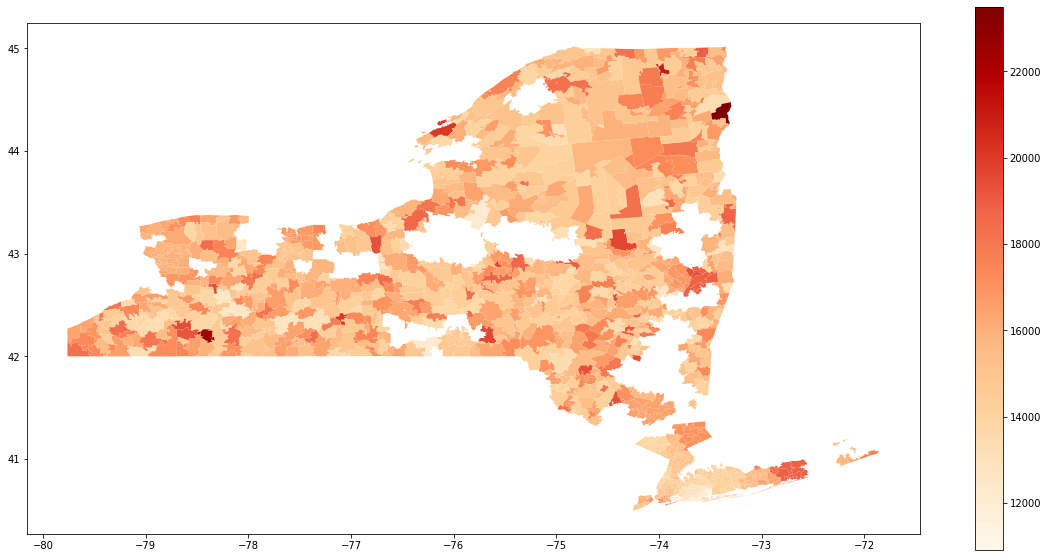

In [104]:
fig, ax = plt.subplots(1, 1)
ny.plot(column='price',ax=ax, legend=True,cmap='OrRd')